<a href="https://colab.research.google.com/github/febala86/Tareas-PIA/blob/main/BARBADILLO_LACHICA_FELIX_PIA07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmos avanzados de Deep Learning

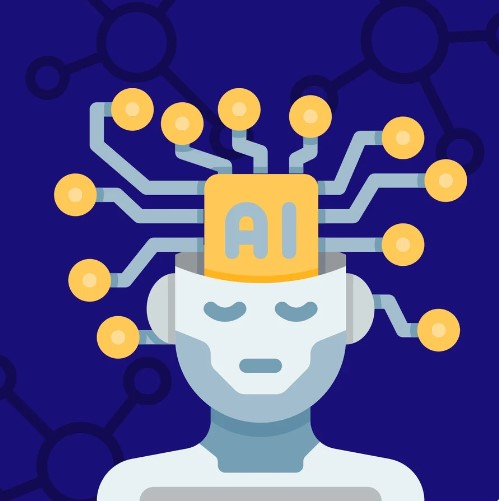

[canvas](https://www.canva.com/p/templates/EAF4Q4eXwPw-presentaci-n-inteligencia-artificial-tecnol-gica-ilustrada-azul-y-amarillo/)

## APARTADO 1 Carga el dataset y prepara los datos:

1. Importa los módulos necesarios de la librería Keras.

In [ ]:
# IMPORTAMOS CON KERAS LOS MÓDULOS NECESARIOS
import tensorflow as tf

#DATASET MNIST
from tensorflow.keras.datasets import mnist

#LIBRERÍAS PARA REDES NEURONALES PROFUNDAS Y CONVOLUCIONALES. CAPA DROPOUT, FLATTEN Y MAXPOOLING.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

#pickle se utiliza para guardar objetos complejos como diccionarios, listas, clases, entre otros en formato binario.
import pickle

2. Separación de los datos para entrenar y test.


In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

3. Ahora analizaremos las dimensiones de este dataset con "**shape**"

Para esta tarea vamos a utilizar el dataset [MNIST](https://en.wikipedia.org/wiki/MNIST_database)

Este es un dataset que se considera el "Hola mundo" de la inteligencia artificial.

Contiene un conjunto de entrenamiento de 60.000 imágenes de dígitos manuscritos (de 0 a 9), y otro conjunto de pruebas con 10.000 muestras adicionales.

Las imágenes originales se normalizaron para que cupiesen en un **grid** de 20x20 píxels (*o estructura de datos bidimensional compuesta por filas y columnas*).

Se utiliza para almacenar y manipular conjuntos de datos organizados en forma de matriz o tabla.  manteniendo las proporciones de la imagen original, y el resultado se centró en un grid de 28x28 píxels.

De estas modificaciones de donde proviene la **"M"** de "*MNIST*" (**Modified National Institute of Standards and Technology**, Instituto de Estándares y Tecnología de los Estados Unidos).

In [18]:
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de x_train: (60000, 28, 28)
Dimensiones de y_train: (60000,)
Dimensiones de x_test: (10000, 28, 28)
Dimensiones de y_test: (10000,)


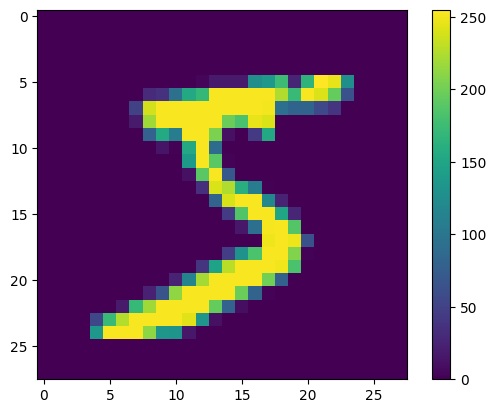

In [19]:
# Visualizamos la imagen número 1 de entrenamiento antes de la normalización
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

4. Normalizaremos los datos ahora:

Para normalizar los datos del dataset **MNIST** de Keras, se suele utilizar la normalización por píxeles, es decir que si un pixel va de 0 a 255 lo que vamos a hacer es dividirlo por 255 lo que garantiza que los valores estén entre 0 y 1.
Posteriormente lo convertiremos a "float32". Esto es, punto flotante de 32 bits.

*En aprendizaje automático, es común trabajar con datos en formato de punto flotante de 32 bits para aprovechar la precisión y eficiencia de estos tipos de datos.*

In [21]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

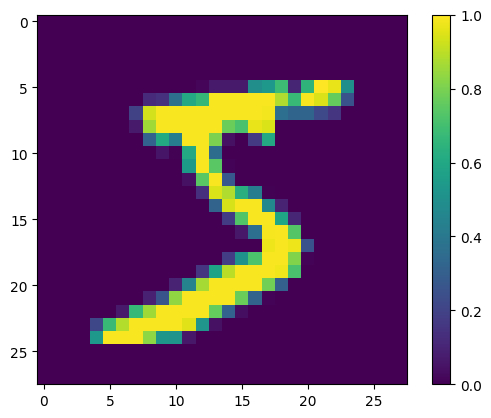

In [22]:
# Visualizamos la imagen número 1 de entrenamiento después de la normalización
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

5. Creamos el primer modelo. Para ello primerop vamos a definir las dimensiones de entrada para el modelo que se utilizaran.
```
"input_shape" -> Especifica la estructura de los datos de entrada en términos de su tamaño y número de canales.
```
>Posteriormente generaremos el modelo con "*Sequential*" e iremos añadiendo capas con "*add*", en pares "*conv2D*" y "*MaxPoling2D*". Luego aplanaremos con la capa "*Flatten*" antes de añadir las capas densamente conectadas y la salida.

In [23]:
input_shape=(28,28,1)

model1 = Sequential()
# Capa de entrada
model1.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
# Reducimos dimensiones de imágenes.
model1.add(MaxPooling2D(pool_size=(2, 2)))
# Imágenes en 3D que tiene que ser aplanadas a un vector (1,4732)
model1.add(Flatten())
# Añadimos capa oculta densamente coenctada de 128 neuronas con activación relu.
model1.add(Dense(128, activation=tf.nn.relu, use_bias=True))
# Añadimos capa oculta densamente coenctada de 70 neuronas con activación relu.
model1.add(Dense(70, activation=tf.nn.relu, use_bias=True))
# Añadimos capa de salida de 10 neuronas con activación tf.nn.softmax, 10 salidas para 10 dígitos que se van a predecir.
model1.add(Dense(10,activation=tf.nn.softmax))

La función **softmax** toma un vector de valores y los convierte en una distribución de probabilidad. Cada elemento del vector de salida está en el rango de 0 a 1, y la suma de todos los elementos es igual a 1. Esto significa que la función softmax asigna probabilidades a cada elemento del vector de entrada.

> Configuramos el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam.

**Adam** (*Adaptive Moment Estimation*) es un optimizador que combina las ventajas de los métodos de **momentum** y **RMSprop**.Efectivo en una amplia gama de tareas de aprendizaje profundo como la clasificación de imágenes.

Para problemas de clasificación multiclase, para predecir entre más de dos clases mutuamente excluyentes, la función loss comúnmente utilizada es Sparse_categorical_crossentropy

In [24]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

> Mostramos resumen de capas.

In [29]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 70)                9030      
                                                                 
 dense_2 (Dense)             (None, 10)                710       
                                                        

### Analizamos el modelo:
> La capa de entrada convolucional tiene unas dimensiones despues de aplicar el kernel size de ((26, 26, 28) )

> Se le aplica una reducción de (2,2)en la siguiente capa quedando las dimensiones a la mitad (13,13,28)

> Por último se aplana convirtiendo el tensor en vector con valor escalar 4732.

> La capa oculta y de salida tienen 70 y 10 respectivamente. Como se explica en el apartado anterior se debe a que se van a tomar 10 salidas para 10 dígitos que se van a predecir.

##APARTADO 2: Crea el modelo convolucional.

6. Entrenar el primer modelo


In [28]:
hst1=model1.fit(x=x_train,y=y_train, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0602 - accuracy: 0.9815
Epoch 2/12
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0385 - accuracy: 0.9874
Epoch 3/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0289 - accuracy: 0.9905
Epoch 4/12
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0201 - accuracy: 0.9934
Epoch 5/12
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0183 - accuracy: 0.9935
Epoch 6/12
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 7/12
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0109 - accuracy: 0.9965
Epoch 8/12
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 9/12
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0094 - accuracy: 0.9968
Epoch 10/12
1875/1875 [==============================] - 36s 19m

In [42]:
#Mostramos y guardamos la evaluzación del entrenamiento y del test para luego guardar en tabla.
test_lost, test_acc = model1.evaluate(x_test, y_test)
train_lost, train_acc = model1.evaluate(x_train, y_train)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0154 - accuracy: 0.9954
Acierto entrenamiento: 
0.9953833222389221
Acierto Test: 
0.9811000227928162


Extrae la información relevante del historial de entrenamiento (hst1) para graficar el "loss" vs accuracy durante el entrenamiento:


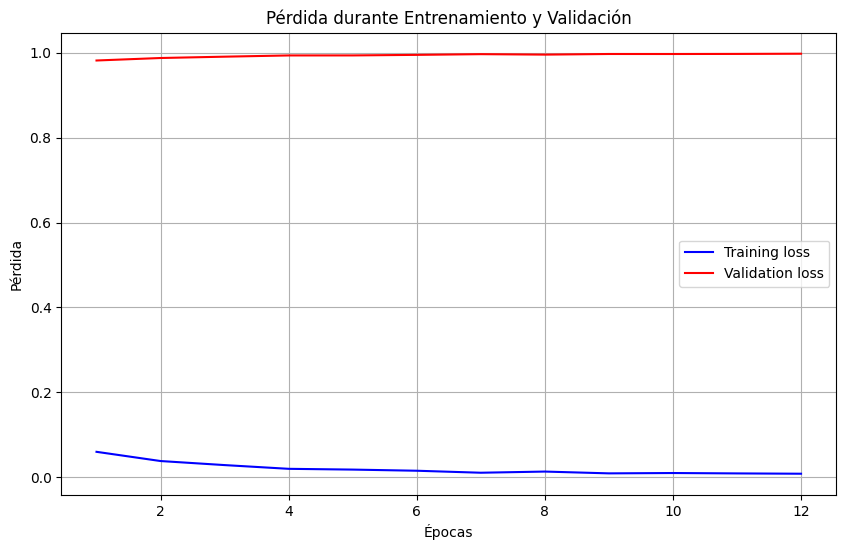

In [85]:
import matplotlib.pyplot as plt

# Extracción de la pérdida del entrenamiento y la accuracy en el mismo.
train_loss_values1 = hst1.history['loss']
train_acc_values1 = hst1.history['accuracy']
epochs1 = range(1, len(train_loss_values1) + 1)

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs1, train_loss_values1, color='b', label='Training loss')
plt.plot(epochs1, train_acc_values1, color='r', label='Validation loss')
plt.title('Pérdida durante Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

> Si sólo representamos el accuracy del entrenamiento:

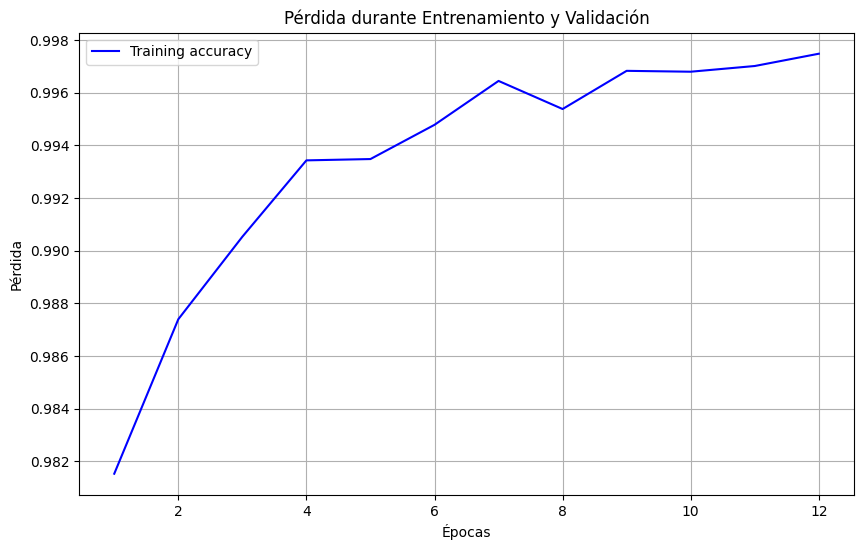

In [87]:
# Extracción de valores de accuracy en el entrenamiento.
epochs1 = range(1, len(train_acc_values1) + 1)

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs1, train_acc_values1, color='b', label='Training accuracy')
plt.title('Pérdida durante Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


In [67]:
#almacenamos en tabla como en la práctica 5.
import pandas as pd

estadisticas=pd.DataFrame(columns=['model','test acc','train acc'])
estadisticas = pd.concat ([estadisticas, pd.DataFrame ([{'model':'Modelo1 RNC','test acc':test_acc ,'train acc':train_acc}])])
estadisticas

,model,test acc,train acc
0,Modelo1 RNC,0.9811,0.995383


7. Probaremos un segundo modelo con redes neuronales convolucionales.

Para mejorar el modelo sin utilizar capas de Dropout, experimentaremos con técnicas como:

>Regularización L2: Agrega términos de penalización L2 a las capas densas para evitar el sobreajuste.

>Batch Normalization: Normaliza las activaciones en cada capa para ayudar al entrenamiento.

```
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras import regularizers
```
>Con esto podemos mejorar el rendimiento del modelo y reducir el sobreajuste sin usar capas Dropout.

Compilamos como en el anterior modelo.

In [70]:
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras import regularizers

In [72]:
# En este segundo modelo añadimos una capa, más neuronas de entrada y mas epoch "50"
input_shape=(28,28,1)

model2 = Sequential()
# Capa de entrada
model2.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
# Reducimos dimensiones de imágenes.
model2.add(MaxPooling2D(pool_size=(2, 2)))
# Imágenes en 3D que tiene que ser aplanadas a un vector (1,4732)
model2.add(Flatten())
# Añadimos capa oculta densamente conectada de 128 neuronas con activación relu y regularización L2
model2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Añadimos batch normalization
model2.add(BatchNormalization())
# Añadimos capa oculta densamente conectada de 70 neuronas con activación relu y regularización L2
model2.add(Dense(70, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Añadimos batch normalization
model2.add(BatchNormalization())
# Añadimos capa de salida de 10 neuronas con activación softmax
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               605824    
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 70)               

### Analizamos el modelo2:
> La capa de entrada convolucional tiene unas dimensiones despues de aplicar el kernel size de ((26, 26, 28) )

> Se le aplica una reducción de (2,2)en la siguiente capa quedando las dimensiones a la mitad (13,13,28)

> Se aplana convirtiendo el tensor en vector con valor escalar 4732.

> Se aplica normalización batch a los parámetros quedando en 512

> La capa oculta densamente conectrada tiene 70 neuronas. Los parámetros quedan a 9030.

> Se aplica normalización batch a los parámetros quedando en 280

> Se aplica capa final como en el anterior modelo con 10 neuronas debido a que se van a tomar 10 salidas para 10 dígitos que se van a predecir.

In [75]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Entrenamos el modelo y lo guardamos en hst2 para luego representar gráficamente pérdida y accuracy.


In [77]:
hst2=model2.fit(x=x_train,y=y_train, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4590 - accuracy: 0.9398
Epoch 2/12
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3849 - accuracy: 0.9466
Epoch 3/12
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3320 - accuracy: 0.9521
Epoch 4/12
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2997 - accuracy: 0.9554
Epoch 5/12
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2785 - accuracy: 0.9567
Epoch 6/12
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2618 - accuracy: 0.9578
Epoch 7/12
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2525 - accuracy: 0.9600
Epoch 8/12
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2475 - accuracy: 0.9600
Epoch 9/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2421 - accuracy: 0.9622
Epoch 10/12
1875/1875 [==============================] - 39s 21m

> Testeamos el modelo:

In [78]:
#Mostramos y guardamos la evaluzación del entrenamiento y del test para luego guardar en tabla.
test_lost, test_acc = model2.evaluate(x_test, y_test)
train_lost, train_acc = model2.evaluate(x_train, y_train)

1875/1875 [==============================] - 12s 7ms/step - loss: 0.1973 - accuracy: 0.9741


In [79]:
estadisticas = pd.concat ([estadisticas, pd.DataFrame ([{'model':'Modelo2 RNC','test acc':test_acc ,'train acc':train_acc}])])
estadisticas

,model,test acc,train acc
0,Modelo1 RNC,0.9811,0.995383
0,Modelo2 RNC,0.9702,0.974083


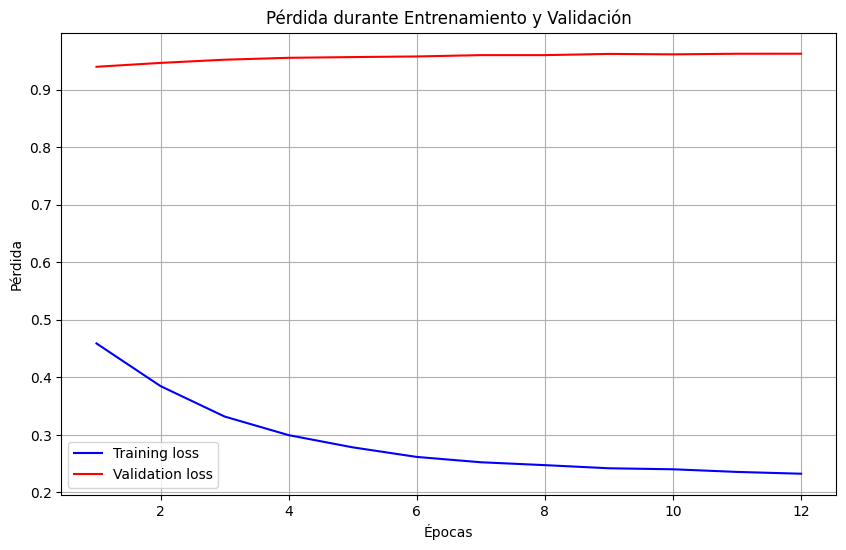

In [88]:
# Extracción de la pérdida del entrenamiento y la accuracy en el mismo.
train_loss_values2 = hst2.history['loss']
train_acc_values2 = hst2.history['accuracy']
epochs2 = range(1, len(train_loss_values2) + 1)

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs2, train_loss_values2, color='b', label='Training loss')
plt.plot(epochs2, train_acc_values2, color='r', label='Validation loss')
plt.title('Pérdida durante Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

Vemos que aunque no hemos usado dropout y hemos optado por capas de regularización L2 y de normalización batch el resultado no ha sido mejor, aunque tampoco mucho peor ya que se ha mantenido en un porcentaje muy proximo al 100.
Representamos ahora el accuracy.

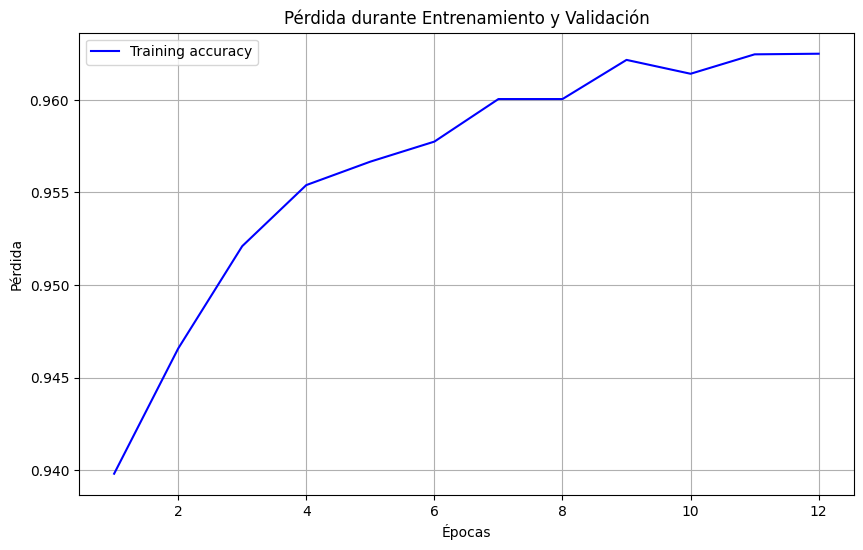

In [89]:
# Extracción de valores de accuracy en el entrenamiento.
epochs2 = range(1, len(train_acc_values2) + 1)

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs2, train_acc_values2, color='b', label='Training accuracy')
plt.title('Pérdida durante Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


###Vamos a comparar modelo 1 y modelo 2 en términos de accuracy vs loss

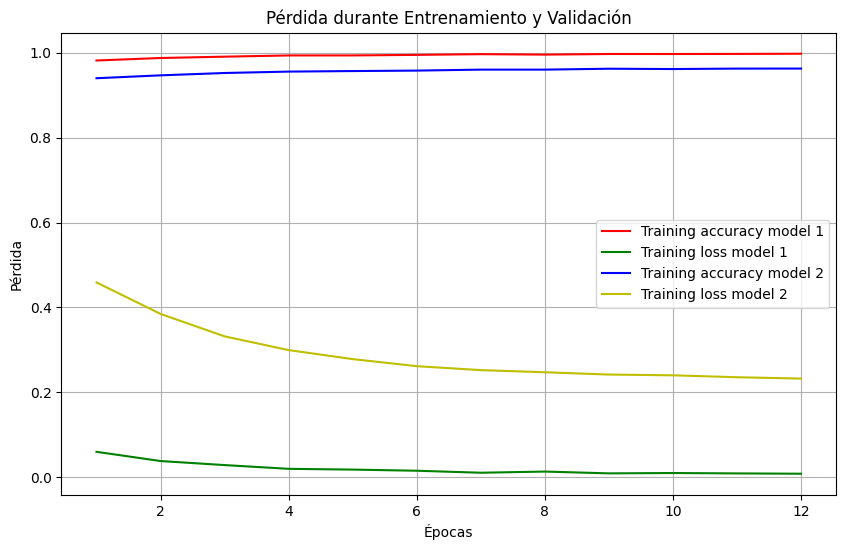

In [92]:
# Extracción de valores de accuracy en el entrenamiento.
epochs2 = range(1, len(train_acc_values2) + 1)

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs2, train_acc_values1, color='r', label='Training accuracy model 1')
plt.plot(epochs2, train_loss_values1, color='g', label='Training loss model 1')
plt.plot(epochs2, train_acc_values2, color='b', label='Training accuracy model 2')
plt.plot(epochs2, train_loss_values2, color='y', label='Training loss model 2')
plt.title('Pérdida durante Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

##APARTADO 3: Crea un modelo no convolucional.


> Tercer modelo, sin capas convolucionales, sería simplemente quitar las capas conv2D y Maxpool2D. Aplanaríamos para la entrada a las capas ocultas y mantendríamos el número de neuronas en la capa de salida.

In [82]:
model3 = Sequential()
model3.add(Flatten(input_shape=input_shape))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(70, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [84]:
model3.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
hst3=model3.fit(x=x_train, y=y_train,epochs=12)

Epoch 1/12
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0326 - accuracy: 0.9890
Epoch 2/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 3/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0216 - accuracy: 0.9927
Epoch 4/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0187 - accuracy: 0.9936
Epoch 5/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0160 - accuracy: 0.9944
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0172 - accuracy: 0.9941
Epoch 7/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0139 - accuracy: 0.9954
Epoch 8/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0139 - accuracy: 0.9955
Epoch 9/12
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0134 - accuracy: 0.9956
Epoch 10/12
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0

##APARTADO 4: Entrena y evalúa los modelos.

In [93]:
#Mostramos y guardamos la evaluzación del entrenamiento y del test para luego guardar en tabla.
test_lost, test_acc = model3.evaluate(x_test, y_test)
train_lost, train_acc = model3.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0126 - accuracy: 0.9955


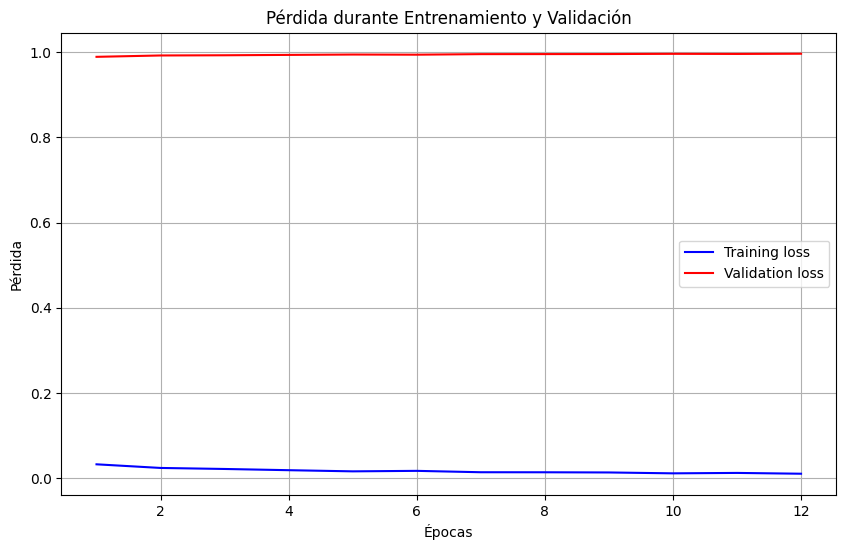

In [95]:
# Extracción de la pérdida del entrenamiento y la accuracy en el mismo.
train_loss_values3 = hst3.history['loss']
train_acc_values3 = hst3.history['accuracy']
epochs3 = range(1, len(train_loss_values3) + 1)

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs3, train_loss_values3, color='b', label='Training loss')
plt.plot(epochs3, train_acc_values3, color='r', label='Validation loss')
plt.title('Pérdida durante Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

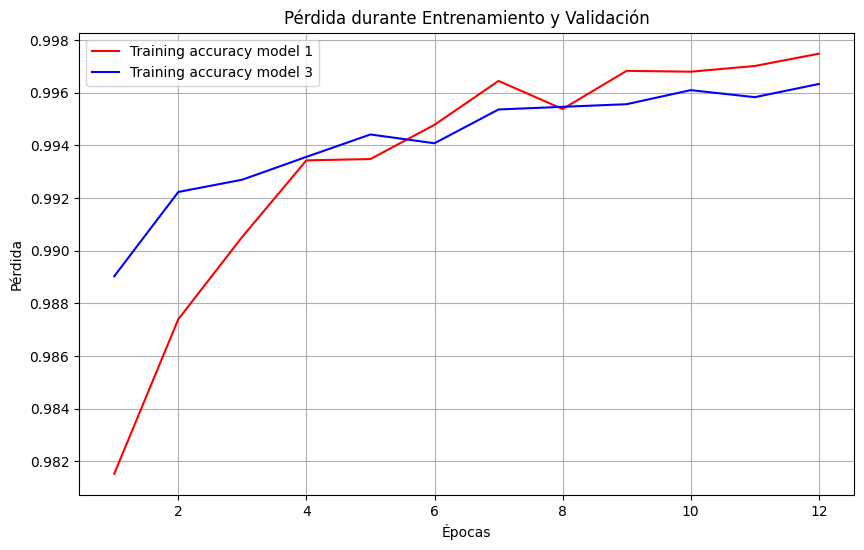

In [97]:
# Extracción de valores de accuracy en el entrenamiento del modelo 1 vs 3.
epochs3 = range(1, len(train_acc_values3) + 1)

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs3, train_acc_values1, color='r', label='Training accuracy model 1')
plt.plot(epochs3, train_acc_values3, color='b', label='Training accuracy model 3')
plt.title('Pérdida durante Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

> En este tercer modelo podemos observar que pese a no ser convolucionales y ser más simple que el modelo 2 y el 1, arroja resultados muy buenos quedando un poco por encima del segundo modelo y no muy lejos del primero.

A continuación muestro en una tabla las estadísitcas de accuracy de los 3 modelos test vs train.

In [94]:
estadisticas = pd.concat ([estadisticas, pd.DataFrame ([{'model':'Modelo3 RNP','test acc':test_acc ,'train acc':train_acc}])])
estadisticas

,model,test acc,train acc
0,Modelo1 RNC,0.9811,0.995383
0,Modelo2 RNC,0.9702,0.974083
0,Modelo3 RNP,0.9751,0.995550


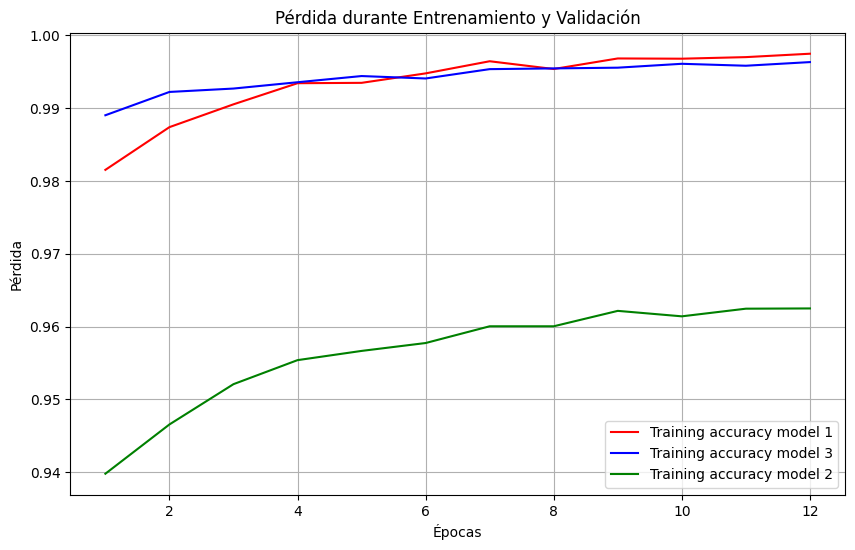

In [98]:
# Extracción de valores de accuracy en el entrenamiento del modelo 1 vs 3.
epochs3 = range(1, len(train_acc_values3) + 1)

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs3, train_acc_values1, color='r', label='Training accuracy model 1')
plt.plot(epochs3, train_acc_values3, color='b', label='Training accuracy model 3')
plt.plot(epochs3, train_acc_values2, color='g', label='Training accuracy model 2')
plt.title('Pérdida durante Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

> Compara los resultados de tu RNC con la RNP. ¿Cuál es mejor? ¿por qué crees? Razona tu respuesta.

En este caso en el que no hay mucha complejidad en las imágenes que tratamos, a nivel de recursos y de complejidad sería mejor el modelo de redes neuronales profundas. Como digo esto es porque no necesitamos tantos recursos computacionales y a nivel de construcción y de entrenamiento sería más rápido por lo tanto eficiente.
Normalmente como se define en el tema, las RNC se usan para clasificación de imágenes complejas, por lo que apriori podemos usar perfectamente este tipo de modelo para el dataset mnist, pero al tener una cantidad de datos más que suficiente, las RNP se comportan bien.
En resumen, creo que en este caso aunque gana por poco las RNC, sería más óptimo en cuestión de recursos y por la cantidad de datos con los que entrenamos el modelo, las RNP.

##PREDICCIÓN DE LOS MODELOS:                                

>**modelo 1**, las **clases** para este dataset son los distintos dígitos del **0 al 9**.

Por lo que definimos class_names con estos y guardamos la predicción del modelo hecha con "**predict**" en una variable para luego representarla.

313/313 [==============================] - 1s 2ms/step


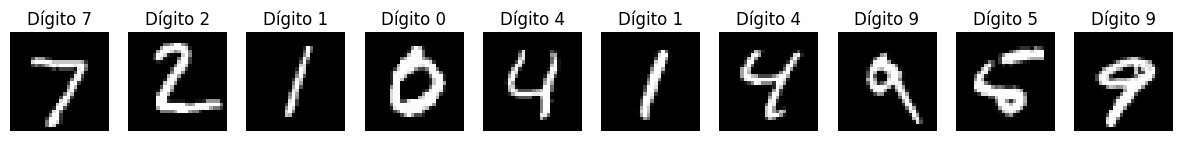

In [145]:
predictions = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predictions3 = model3.predict(x_test)

class_names = ['Dígito 0', 'Dígito 1', 'Dígito 2', 'Dígito 3', 'Dígito 4',
               'Dígito 5', 'Dígito 6', 'Dígito 7', 'Dígito 8', 'Dígito 9']

# Obtener las predicciones para las primeras imágenes de test, mostraremos 10. Modelo 1
num_imagenes = 10
predicted_labels = np.argmax(predictions, axis=1)

# Visualizar las imágenes y sus etiquetas predichas
plt.figure(figsize=(15, 3))
for i in range(num_imagenes):
    plt.subplot(1, num_imagenes, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[predicted_labels[i]])
    plt.axis('off')
plt.show()


In [146]:
# Obtener las etiquetas reales para las primeras imágenes de test, modelo 3.
true_labels = y_test[:num_imagenes]

# Comparar las etiquetas predichas con las etiquetas reales
for i in range(num_imagenes):
    predicted_label = np.argmax(predictions3[i]) # cambiar aquí predicciones.
    true_label = true_labels[i]
    if predicted_label == true_label:
        print(f'Predicción correcta para la imagen {i+1}: {class_names[predicted_label]}')
    else:
        print(f'Predicción incorrecta para la imagen {i+1}: Predicho: {class_names[predicted_label]}, Real: {class_names[true_label]}')

Predicción correcta para la imagen 1: Dígito 7
Predicción correcta para la imagen 2: Dígito 2
Predicción correcta para la imagen 3: Dígito 1
Predicción correcta para la imagen 4: Dígito 0
Predicción correcta para la imagen 5: Dígito 4
Predicción correcta para la imagen 6: Dígito 1
Predicción correcta para la imagen 7: Dígito 4
Predicción correcta para la imagen 8: Dígito 9
Predicción incorrecta para la imagen 9: Predicho: Dígito 6, Real: Dígito 5
Predicción correcta para la imagen 10: Dígito 9


Como la tasa de exactitud es próxima a 1 tanto en el modelo 1 como en el 3 pues no falla prácticamente en los 10 primeros números del dataset mnist.

<div align="left">
<a href=https://github.com/dashboard/>
<img src="https://www.enriquedans.com/wp-content/uploads/2018/06/GitHub-Octocat.jpg" alt="Enlace a github del autor" width="150" height="150"align="justify" /></a>
<p><a href=https://www.enriquedans.com/wp-content/uploads/2018/06/GitHub-Octocat.jpg/><font size="1" color="#87CEEB">Imagen<p/></a></div>

#BIBLIOGRAFÍA
Referencia  | Enlace
-------------------|------------------
¿Qué son las redes neuronales convolucionales?|[Pincha aquí](https://www.ibm.com/es-es/topics/convolutional-neural-networks)
¿Qué son los tensores?|[Pincha aquí](https://telefonicatech.com/blog/deep-learning-para-todos-los-publicos)
¿Tratamiento de imágenes usando ImageDataGenerator en Keras?|[Pincha aquí](https://www.enmilocalfunciona.io/tratamiento-de-imagenes-usando-imagedatagenerator-en-keras/)
¿Qué son las redes neuronales convolucionales?|[Pincha aquí](https://www.ibm.com/es-es/topics/convolutional-neural-networks)
Dataset MNIST | [Picha aquí](https://interactivechaos.com/es/manual/tutorial-de-deep-learning/el-dataset-mnist)
Técnicas de Regulación de Redes Neuronales | [Picha aquí](https://www.linkedin.com/pulse/técnicas-de-regulación-redes-neuronales-un-vistazo-al-jordi/?originalSubdomain=es)
Normalicación BATCH RNP | [Picha aquí](https://www.youtube.com/watch?v=dXB-KQYkzNU)
Tutorial  de TensorFlow | [Picha aquí](https://www.youtube.com/watch?v=kJSUq1PLmWg)
